In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [2]:
%matplotlib inline

In [60]:
file_path = "./Series_2.xlsx"

In [61]:
df = pd.read_excel(file_path)

In [62]:
df.head()

,Time,Value
0,1,50
1,2,120
2,3,-25
3,4,31
4,5,94


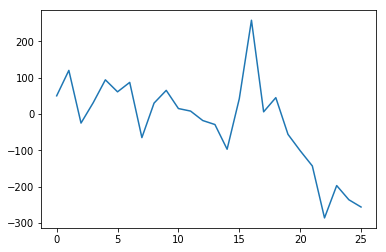

In [63]:
plt.plot(df["Value"])

In [64]:
X = df["Value"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -1.743415
p-value: 0.408894
Critical Values:
	1%: -3.724
	5%: -2.986
	10%: -2.633
Failed to Reject Ho - Time Series is Non-Stationary


In [65]:
#rolling mean

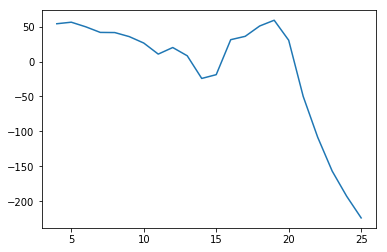

In [66]:
df.Value.rolling(window=5).mean().plot()

In [67]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

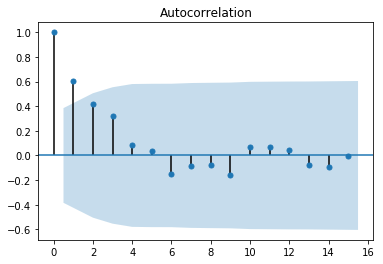

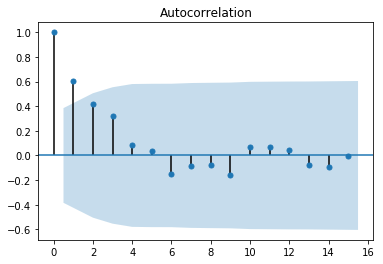

In [68]:
plot_acf(df.Value)

c:\users\akash\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


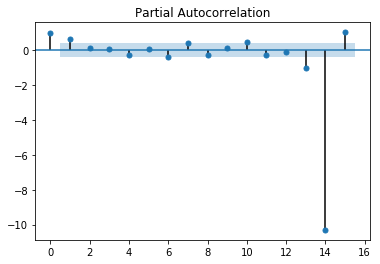

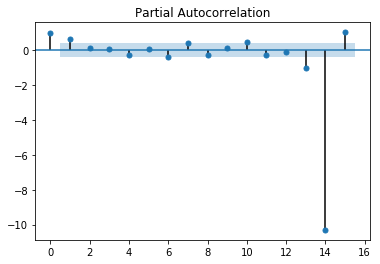

In [69]:
plot_pacf(df.Value)

In [70]:
df['Valud'] = df['Value'] - df['Value'].shift(1)

In [71]:
df.head()

,Time,Value,Valud
0,1,50,NaN
1,2,120,70.0
2,3,-25,-145.0
3,4,31,56.0
4,5,94,63.0


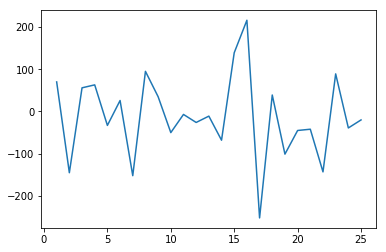

In [72]:
df.Valud.plot()

In [73]:
# Create transformation columns
import numpy as np

# Calculate the log 
df['Vallog'] = np.log(df.Value)

# Calculate the square root 
#trainingdata['adj_sqrt'] = np.sqrt(trainingdata['#Passengers'])

# Calculate the cubed root 
#trainingdata['adj_cbrt'] = np.cbrt(trainingdata['#Passengers'])

c:\users\akash\appdata\local\programs\python\python36\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


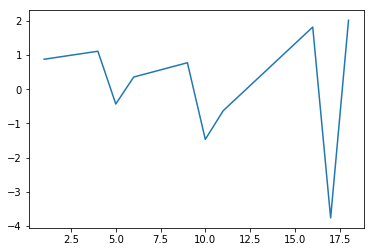

In [74]:
df['Vallogdiff'] = df['Vallog'] - df['Vallog'].shift(1)
df['Vallogdiff'].dropna().plot()

In [75]:
df['MA'] = df['Value'].rolling(window = 30).mean()

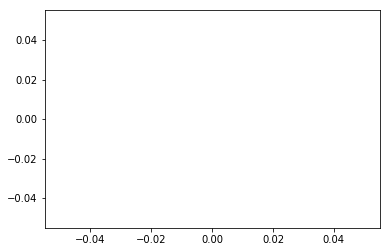

In [76]:
df.MA.plot()

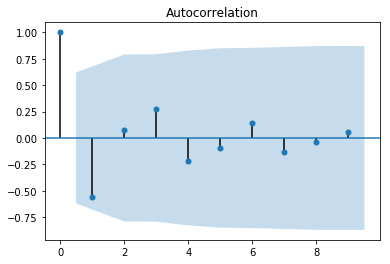

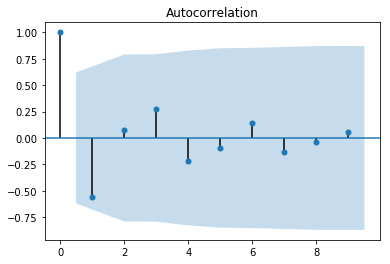

In [77]:
plot_acf(df.Vallogdiff.dropna())

In [20]:
df["Diff_Value"] = df["Value"].diff()

In [21]:
diff_values = df["Diff_Value"].values
Y = diff_values[~np.isnan(diff_values)]

In [22]:
ts_values_orig = df["Value"].values
ts_values = ts_values_orig[:-1]

In [23]:
X = sm.add_constant(ts_values)

In [24]:
model = sm.OLS(Y,X)
results = model.fit()

In [25]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     492.2
Date:                Sat, 31 Aug 2019   Prob (F-statistic):          1.74e-106
Time:                        16:56:52   Log-Likelihood:                -14130.
No. Observations:                9999   AIC:                         2.826e+04
Df Residuals:                    9997   BIC:                         2.828e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0659      0.010      6.347      0.0

In [26]:
results.tvalues[1]

-22.184930227348683